Accuracy: 100.00%


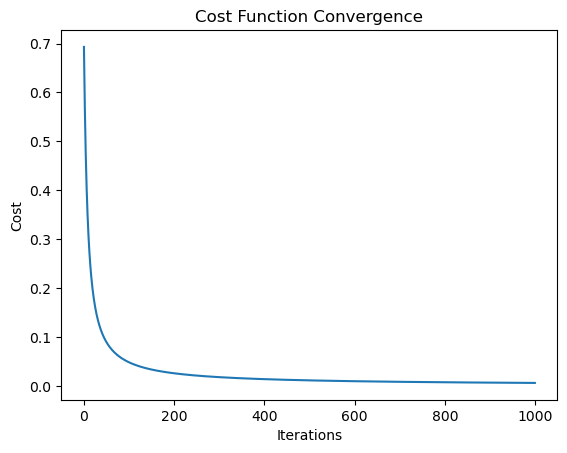

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        """
        Initialize Logistic Regression model.
        :param learning_rate: Learning rate for gradient descent.
        :param n_iters: Number of iterations for optimization.
        """
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """
        Compute the sigmoid function.
        :param z: Input value(s).
        :return: Sigmoid of z.
        """
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, y_true, y_pred):
        """
        Compute binary cross-entropy loss.
        :param y_true: True labels.
        :param y_pred: Predicted probabilities.
        :return: Loss value.
        """
        n_samples = len(y_true)
        cost = -(1 / n_samples) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return cost

    def fit(self, X, y):
        """
        Train the logistic regression model using gradient descent.
        :param X: Input features (n_samples, n_features).
        :param y: True labels (n_samples).
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.costs = []

        for _ in range(self.n_iters):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid function
            y_pred = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute and store cost
            cost = self.compute_cost(y, y_pred)
            self.costs.append(cost)

    def predict(self, X):
        """
        Predict labels for input data.
        :param X: Input features.
        :return: Predicted labels (0 or 1).
        """
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_pred]

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Select two classes for binary classification (e.g., class 0 and class 1)
X = X[y != 2]  # Remove the third class
y = y[y != 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(learning_rate=0.1, n_iters=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the cost over iterations
import matplotlib.pyplot as plt
plt.plot(model.costs)
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()
